# 模板匹配

### 目标

在本章中，您将学习
- 使用模板匹配在图像中查找对象 
- 你将看到以下功能：**cv.matchTemplate**()，**cv.minMaxLoc**()

### 理论

模板匹配是一种用于在较大图像中搜索和查找模板图像位置的方法。为此，OpenCV带有一个函数**cv.matchTemplate**()。
它只是将模板图​​像滑动到输入图像上（就像在2D卷积中一样），然后在模板图像下比较模板和输入图像的拼图。
OpenCV中实现了几种比较方法。（您可以检查文档以了解更多详细信息）。它返回一个灰度图像，其中每个像素表示该像素的邻域与模板匹配的程度。

如果输入图像的大小为`(WxH)`，而模板图像的大小为`(wxh)`，则输出图像的大小将为`(W-w + 1，H-h + 1)`。得到结果后，可以使用**cv.minMaxLoc**()函数查找最大/最小值在哪。将其作为矩形的左上角，并以`(w，h)`作为矩形的宽度和高度。该矩形是您模板的区域。

> **注意**
如果使用**cv.TM_SQDIFF**作为比较方法，则最小值提供最佳匹配。

### OpenCV中的模板匹配

作为示例，我们将在梅西的照片中搜索他的脸。所以我创建了一个模板，如下所示：

![](data/messi_face.jpg)

我们将尝试所有比较方法，以便我们可以看到它们的结果如何：

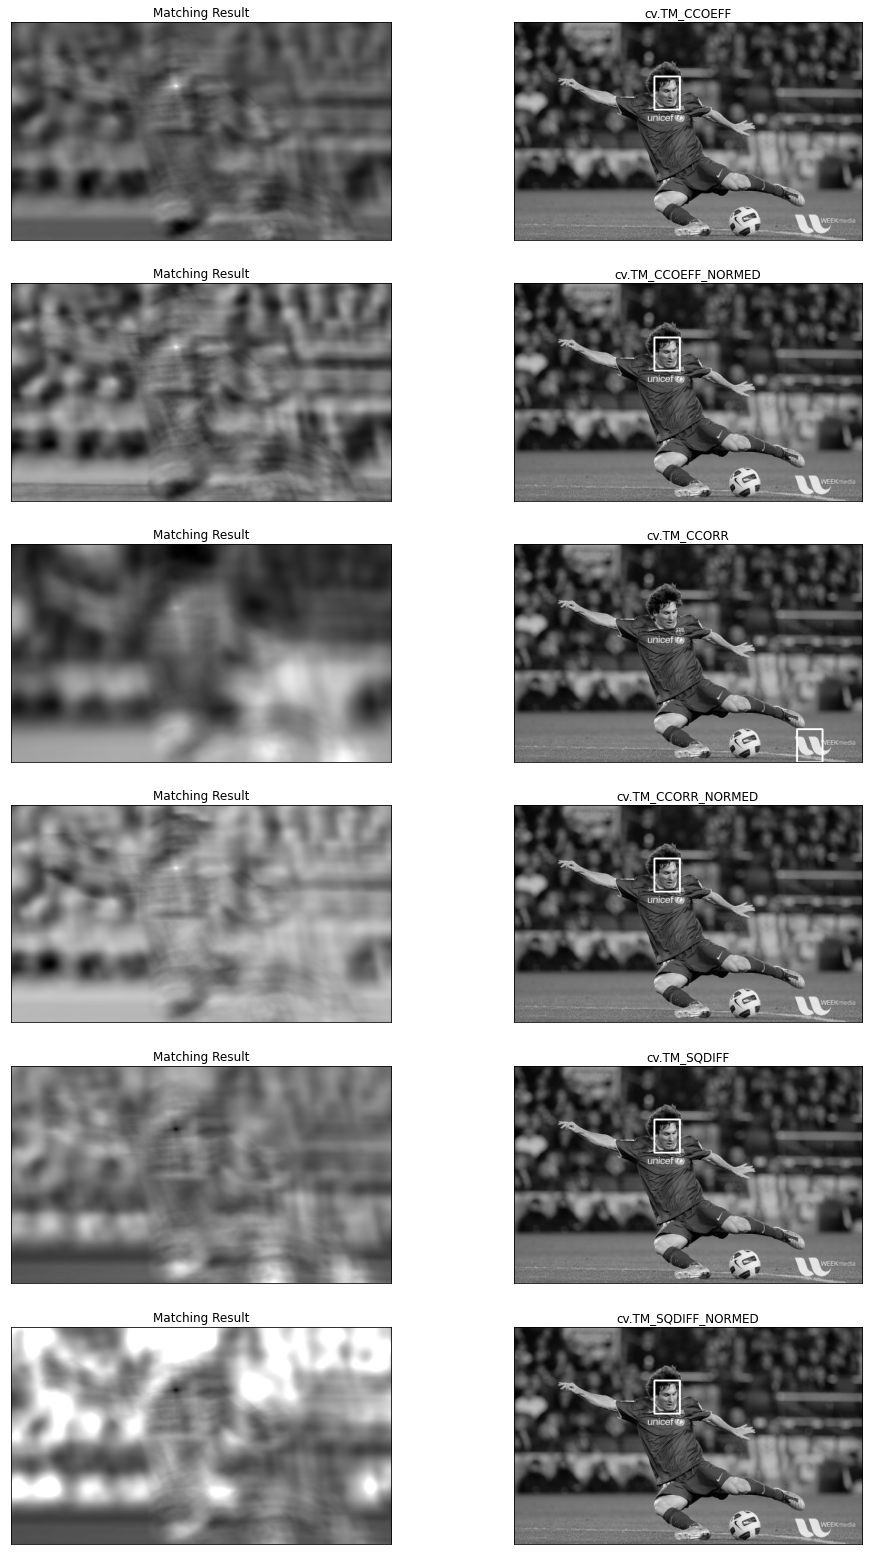

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/messi5.jpg',0)
img2 = img.copy()
template = cv.imread('data/messi_face.jpg',0)
w, h = template.shape[::-1]

# 列表中所有的6种比较方法
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

plt.figure(figsize=(16,28))

for i in range(6):
    img = img2.copy()
    method = eval(methods[i])

    # 应用模板匹配
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # 如果方法是TM_SQDIFF或TM_SQDIFF_NORMED，则取最小值
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(6, 2, i*2+1),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(6, 2, i*2+2),plt.imshow(img,cmap = 'gray')
    plt.title(methods[i]), plt.xticks([]), plt.yticks([])
    
plt.show()

您会看到，使用**cv.TM_CCORR**的结果并不理想。

### 多对象的模板匹配

在上一节中，我们在图像中搜索了梅西的脸，该脸在图像中仅出现一次。假设您正在搜索具有多次出现的对象，则**cv.minMaxLoc**()不会为您提供所有位置。在这种情况下，我们将使用阈值化。因此，在此示例中，我们将使用著名游戏**Mario**的屏幕截图，并在其中找到硬币。

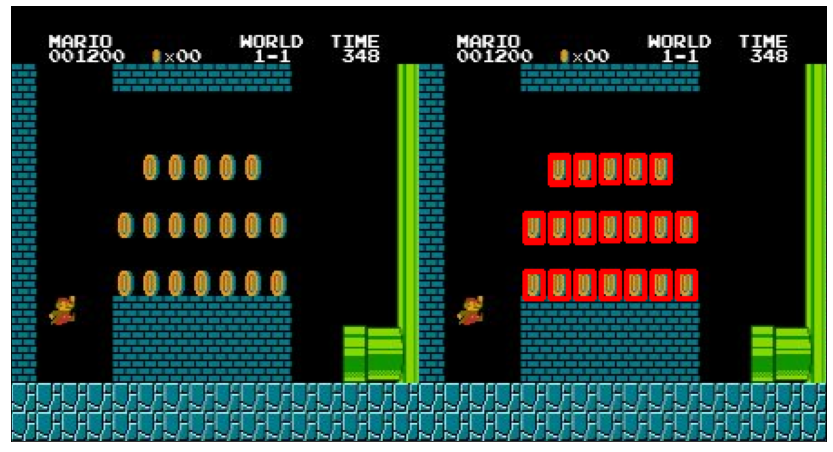

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/mario.png')
img_rgb = img.copy()
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

template = cv.imread('data/mario_coin.png',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

res = np.hstack((img, img_rgb))

plt.figure(figsize=(16,8))
plt.imshow(cv.cvtColor(res,cv.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])
plt.show()

### 附加资源

### 练习